# Библиотеки для анализа данных. NumPy и SciPy

In [2]:
# НИКОГДА НЕ ДЕЛАЙТЕ ТАК. ВООБЩЕ НИКОГДА
# from numpy import *

import numpy as np

In [2]:
from itertools import chain, zip_longest


def print_as_columns(*args, sep='\t'):
    """
    print arrays as columns
    """
    args = map(repr, args)
    args = list(map(lambda s: s.split('\n'), args))
    width = max(map(len, chain.from_iterable(args)))
    
    fill = lambda s: '{:<{width}s}'.format(s, width=width)
    fillvalue = fill('')
    
    args = map(lambda e: map(fill, e), args)
    args = map(sep.join, zip_longest(*args, fillvalue=fillvalue))
    print(*args, sep='\n')

## Многомерные массивы в Python

Здесь и далее будем считать, что понятия "многомерные массивы" и "матрицы" эквивалентны.

Многомерные массивы в Python можно рассмаривать, например, как списки списков:

In [3]:
a = [[ 0,  1,  2,  3,  4],
     [ 5,  6,  7,  8,  9],
     [10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]]
a

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]

In [4]:
a[0][2]

2

In [5]:
rows, cols = 1_000, 1_000

A = [list(range(i * cols, (i + 1) * cols)) for i in range(0, rows)]

# show first 5 rows and first 10 cols
[row[:10] for row in A[:5]]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009],
 [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
 [3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009],
 [4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009]]

In [6]:
%%timeit B = [[0 for j in range(cols)] for i in range(rows)]

# list cycles

for i in range(rows):
    for j in range(cols):
        B[i][j] = 2 * A[i][j]

407 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit B = [[0 for j in range(cols)] for i in range(rows)]

# list cycles with optimization

for i in range(rows):
    A_row, B_row = A[i], B[i]
    for j in range(cols):
        B_row[j] = 2 * A_row[j]

315 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit

# list generator

B = [[2 * e for e in row] for row in A]

142 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit A_numpy = np.asarray(A)

B = 2 * A_numpy

1.39 ms ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Таким образом, главным преимуществом библиотеки `numpy` являтся высокая скорость работы: ускорение почти в 50 раз по сравнению с лучшим вариантом на python.

| Реализация              | Время работы |
|-------------------------|--------------|
| lists cycles            | 131 ms       |
| lists cycles (optimize) | 88.7 ms      |
| lists generators        | 68.9 ms      |
| numpy                   | 1.54 ms      |

Самое медленное место в языке – циклы. **Думайте** о количестве операций (потенциальных вызовах функций).

## Создание массивов

Вариант 1: создание `numpy.ndarray` заданных форм и характеристик:
* `np.zeros` – матрица из нулей;
* `np.ones` – матрица из единицы;
* `np.eye` – единичная марица;
* `np.arange`, `np.linspace` – массивы с дискретным шагом.

https://numpy.org/doc/stable/reference/routines.array-creation.html

In [15]:
ar = np.zeros(5)
ar

array([0., 0., 0., 0., 0.])

In [30]:
ar = np.zeros((2, 3))
ar

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.zeros((5, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [31]:
# похоже на range, но все числа хранятся в памяти

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
# а еще умеет ходить с дробным шагом

np.arange(2, 8, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5])

In [33]:
# разбивает отрезок на num - 1 отрезков

np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Вариант 2: создание из python объектов

In [34]:
a = [[ 0,  1,  2,  3,  4],
     [ 5,  6,  7,  8,  9],
     [10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]]

a = np.asarray(a, dtype=int)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Есть и обратная операция.

In [16]:
a = a.tolist()
print(type(a))
a

<class 'list'>


[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19]]

### Важное замечание о скорости работы

In [17]:
%%timeit A_numpy = np.asarray(A)

B = 2 * A_numpy

1.61 ms ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit

A_numpy = np.asarray(A)
B = 2 * A_numpy

67.7 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%timeit

# list generator

B = [[2 * e for e in row] for row in A]

67.9 ms ± 848 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Поэлементные операции со скалярами

In [17]:
a = [[ 0,  1,  2,  3,  4],
     [ 5,  6,  7,  8,  9],
     [10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]]

a = np.asarray(a, dtype=int)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

`numpy.ndarray` поддерживает арифметические поэлементые операции:

`c = op(a, sc)` $\Longleftrightarrow$ `c[i,j] = op(a[i,j], sc)`

In [18]:
a + 10   # np.add

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [19]:
a * 10

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190]])

In [20]:
a / 10

array([[0. , 0.1, 0.2, 0.3, 0.4],
       [0.5, 0.6, 0.7, 0.8, 0.9],
       [1. , 1.1, 1.2, 1.3, 1.4],
       [1.5, 1.6, 1.7, 1.8, 1.9]])

In [21]:
a // 10

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

Есть и поддержка более сложных математических функций.

In [26]:
a ** 0.5  # same as np.pow(a, 2)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [27]:
np.sqrt(a)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [24]:
np.sin(a)

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849],
       [-0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736],
       [ 0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721]])

И поддержка логических операций.

In [25]:
a >= 10

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## Устройство массивов, их размерность и размеры

<img src="files/data.png" width="450px">

In [35]:
a = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 0]], 
             dtype=float)
a

array([[1., 2., 3., 4., 5.],
       [6., 7., 8., 9., 0.]])

Массивы `numpy.ndarray` в основе себя используют обычные массивы фиксированного размера (атрибут `data`). 

Многомерные массивы хранятся как один большой последовательный блок памяти.

In [29]:
a.data

У `numpy.ndarray` есть атрибут `dtype`, который содержит информацию о типе данных, хранимых в массиве.

In [30]:
a.dtype

dtype('float64')

In [31]:
a.dtype.itemsize  # sizeof(float64)

8

Поменять тип массива можно с помощью метода `astype`, что очевидно приведет копированию данных.

In [32]:
a.astype(int).dtype

dtype('int64')

In [33]:
a.astype(np.uint8).dtype

dtype('uint8')

У `numpy.ndarray` есть атрибут `shape` – размер массива.

In [34]:
a.shape

(2, 5)

Для изменения размера массива используется метод `reshape`. Метод возвращает новый объект, который имеет тот же атрибут `data`, что и исходный массив. Т.е. копирования данных **НЕ происходит**.

In [35]:
a.reshape(5, 2)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

In [36]:
# размеры должны быть корректными

a.reshape(5, 3)

ValueError: cannot reshape array of size 10 into shape (5,3)

In [37]:
# -1 говорит о том, что длина размерности может быть вычислена автоматически

a.reshape(-1, 2)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

In [38]:
a.ravel()  # same as a.reshape(-1)

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 0.])

In [39]:
a.flatten()   # same as a.ravel() and copy

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 0.])

Еще раз подчеркнем, что копирования данных **не происходит**!

In [40]:
a

array([[1., 2., 3., 4., 5.],
       [6., 7., 8., 9., 0.]])

In [41]:
b = a.reshape(-1, 2)
b

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

In [42]:
a[-1, -1] = 10
a

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]])

In [43]:
b

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]])

Другой способ в этом убедиться – получить адрес памяти:

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ctypes.html

In [44]:
a.ctypes.data, b.ctypes.data, a.ctypes.data == b.ctypes.data

(140380096613920, 140380096613920, True)

In [45]:
a = np.arange(2  * 3 * 4).reshape(-1, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [46]:
a.shape

(2, 3, 4)

У массивов `numpy.ndarray` есть операция транспонирования. Она тоже **НЕ приводит** к копированию данных. 

In [49]:
a.T

array([[1., 6.],
       [2., 7.],
       [3., 8.],
       [4., 9.],
       [5., 0.]])

In [50]:
a.transpose()

array([[1., 6.],
       [2., 7.],
       [3., 8.],
       [4., 9.],
       [5., 0.]])

Фиктивная размерность – размерность длины 1. Фиктивная размерность нужна для того, чтобы совершать матричные операции, например, умножение вектора на матрицу.

In [51]:
a = a.ravel()
a

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 0.])

In [52]:
b = a[np.newaxis,:]  # same as a.reshape(1, -1)
b

array([[1., 2., 3., 4., 5., 6., 7., 8., 9., 0.]])

In [53]:
b.shape

(1, 10)

In [54]:
b = a[:,np.newaxis]  # same as a.reshape(-1, 1)
b

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.],
       [0.]])

In [55]:
b.shape

(10, 1)

### 🧐 Интересный факт про размерность массивов и копирование

У `numpy.ndarray` есть атрибут `strides`, который регулирует порядок обхода массива (атрибут `data`). Этот атрибут очень важен для многомерных массивов.

Первое число показывает, сколько байт нужно прочитать, чтобы переместиться на следующую строку и остаться в том же столбце.

Второе число показывает, сколько байт нужно прочитать, чтобы переместиться на следующий столбец и остаться в той же строке.

In [56]:
c = np.arange(12).reshape(3, -1)
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
c.shape

(3, 4)

In [59]:
c.dtype.itemsize

8

In [61]:
assert c.strides == (c.shape[1] * c.dtype.itemsize, c.dtype.itemsize,)

# для перехода к следующей строке нужно считать 4 * 8 байт
# для перехода к следующему стобцу нужно прочитать 8 байт

c.strides  # (4 * 8, 8)

(32, 8)

Поменяем размерность массива и увидим, как меняется атрибут `strides`.

In [62]:
c = c.reshape(-1, 2)
c

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [65]:
c.dtype

dtype('int64')

In [63]:
c.shape

(6, 2)

In [64]:
assert c.strides == (c.shape[1] * c.dtype.itemsize, c.dtype.itemsize,)

# для перехода к следующей строке нужно считать 2 * 8 байт
# для перехода к следующему стобцу нужно прочитать 8 байт

c.strides  # (2 * 8, 8)

(16, 8)

Операция транспонирования, как уже говорилось выше не приводит к копированию данных. Она меняет атрибут `strides`, который регулирет порядок обхода массива.

Напомним, что `c.data = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]`.

In [66]:
c = c.T
c

array([[ 0,  2,  4,  6,  8, 10],
       [ 1,  3,  5,  7,  9, 11]])

In [67]:
c.shape

(2, 6)

In [68]:
assert c.strides == (c.dtype.itemsize, c.shape[0] * c.dtype.itemsize, )

# для перехода к следующей строке нужно считать 8 байт
# для перехода к следующему столбцу нужно прочитать 2 * 8 байт

c.strides  # (8, 2 * 8)

(8, 16)

In [69]:
a

array([1., 2., 3., 4., 5., 6., 7., 8., 9., 0.])

In [71]:
b = a.reshape(-1, 5)
b

array([[1., 2., 3., 4., 5.],
       [6., 7., 8., 9., 0.]])

In [72]:
id(a), id(b)

(4611650704, 4611706432)

### Копия и представление (view)

view – новый объект, ссылающийся на те же данные, что и исходный массив.

Существует несколько вариантов создания массивов с помощью функций `np.array` и `np.asarray`.

`np.array` создает копию массива всегда.

`np.asarray` создает копию при необходимости.

1. При создании массива из списка всегда **создается копия**.

In [73]:
a = [1, 2, 3, 4, 5, 6]
b = np.array(a)
c = np.asarray(a)

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6])
c = array([1, 2, 3, 4, 5, 6])


In [74]:
a[0] = 0

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6])
c = array([1, 2, 3, 4, 5, 6])


2. При создании массива из другого массива **копия не создается**.

In [75]:
a = np.asarray([1, 2, 3, 4, 5, 6])
b = np.array(a)
c = np.asarray(a)

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6])
c = array([1, 2, 3, 4, 5, 6])


In [76]:
a[0] = 0

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6])
c = array([0, 2, 3, 4, 5, 6])


3. При создании массива из другого массива и смены типа данных **создается копия**.

In [77]:
a = np.asarray([1, 2, 3, 4, 5, 6], dtype=np.int8)
b = np.array(a, dtype=np.uint8)
c = np.asarray(a, dtype=np.uint8)

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6], dtype=uint8)
c = array([1, 2, 3, 4, 5, 6], dtype=uint8)


In [78]:
a[0] = 0

print("b =", repr(b))
print("c =", repr(c))

b = array([1, 2, 3, 4, 5, 6], dtype=uint8)
c = array([1, 2, 3, 4, 5, 6], dtype=uint8)


`np.asarray` полезен тогда, когда вы хотите все время работать с `np.ndarray`, но хотите создавать копию данных только в тех случаях, когда это необходимо.

In [79]:
def multiply_by(data, by):
    data = np.asarray(data)
    return data * by

In [80]:
multiply_by(np.arange(4), 2)

array([0, 2, 4, 6])

In [81]:
multiply_by(range(4), 2)

array([0, 2, 4, 6])

In [82]:
multiply_by([0, 1, 2, 3], 2)

array([0, 2, 4, 6])

Некоторые операции сами по себе создают копии, а некоторые view.

https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

## Поэлементные бинарные операции

In [83]:
a = [[1, 0, 0, 0, 1], [1, 0, 1, 0, 1]]
a = np.asarray(a)
a

array([[1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1]])

In [84]:
b = np.arange(1, 11).reshape(-1, 5)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

Для начала рассмотрим массивы одинаковых размеров.

`numpy.ndarray` поддерживает арифметические поэлементые операции над двумя массивами:

`c = op(a, b)` $\Longleftrightarrow$ `c[i,j] = op(a[i,j], b[i,j])`

In [85]:
a + b   # same as np.add

array([[ 2,  2,  3,  4,  6],
       [ 7,  7,  9,  9, 11]])

In [86]:
a * b   # same as np.multiply

array([[ 1,  0,  0,  0,  5],
       [ 6,  0,  8,  0, 10]])

И некоторые более сложные функции...

In [87]:
(b <= 5).astype(int)

array([[1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [88]:
np.fmax(a, (b <= 5).astype(int))   # element-wise maximum

array([[1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1]])

Есть и поддержка булевых операций.

In [89]:
a == (b <= 5).astype(int)

array([[ True, False, False, False,  True],
       [False,  True, False,  True, False]])

Есть поддержка матричного умножения.

In [90]:
a @ b.T  # same as np.matmul(a, b.T)

array([[ 6, 16],
       [ 9, 24]])

In [91]:
np.dot(a, b.T)  # same as a.dot(b.T)

array([[ 6, 16],
       [ 9, 24]])

Что еще умеют бинарные `ufunc`:

https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html#Advanced-Ufunc-Features

## Приведение размерностей (Broadcasting)

Теперь рассмотрим массивы с разными размерностями.

Пусть, нам дана матрица $X$ размером $5 \times 10$ и вектор $y$ длины 10. Пусть, мы хотим прибавить вектор к каждой строке матрицы. 

In [92]:
x = np.arange(50).reshape(-1, 10)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [93]:
y = np.arange(10) * 10
y

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [94]:
x + y

array([[  0,  11,  22,  33,  44,  55,  66,  77,  88,  99],
       [ 10,  21,  32,  43,  54,  65,  76,  87,  98, 109],
       [ 20,  31,  42,  53,  64,  75,  86,  97, 108, 119],
       [ 30,  41,  52,  63,  74,  85,  96, 107, 118, 129],
       [ 40,  51,  62,  73,  84,  95, 106, 117, 128, 139]])

Наивный способ работает верно.

Поменяем условие, пусть, $y$ – вектор длины 5. Пусть, мы хотим прибавить вектор к каждому столбцу матрицы.

In [95]:
y = np.arange(5) * 10
y

array([ 0, 10, 20, 30, 40])

In [96]:
x + y

ValueError: operands could not be broadcast together with shapes (5,10) (5,) 

In [97]:
 y.reshape(-1, 1)

array([[ 0],
       [10],
       [20],
       [30],
       [40]])

Наивный способ не работает. Попробуем воспользоваться фиктивной размерностью.

In [98]:
x + y[:, np.newaxis]  # same as x + y.reshape(-1, 1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]])

In [99]:
a = np.arange(10)
a.shape

(10,)

In [103]:
a.reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [104]:
a.reshape(-1, 1).shape

(10, 1)

**Правило приведения размерностей (broadcasting):**

1. Предположим, что `a.shape = (a_1, a_2, ..., a_n)` и `b.shape = (b_1, b_2, ..., b_n)`. Над `a` и `b` можно произвести поэлементую бинарную операцию, если $\forall \; i \in \overline{1..n}$ выполнено хотя бы одно из условий:
    * `a_i == b_i`;
    * `a_i == 1`;
    * `b_i == 1`.


2. Если число размерностей не совпадают, то к массиву меньшей размерности добавляются ведущие фиктивные размерности. 

Документация: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

Проверить явное приведение размерности можно через функции `np.broadcast_to` и `np.broadcast_arrays`.

<font color='red'>**Задача.** Какие из этих команд будут выполняться с ошибкой?</font>

1. `np.ones((2, 3)) + np.ones(3)`

2. `np.ones(2) + np.ones((2, 3))`

3. `np.zeros((4, 3)) + np.ones((4, 1))`

4. `np.zeros((3, 4)) + np.ones((4, 3))`

5. `np.zeros((1, 3, 5)) + np.zeros((1, 3))`

6. `np.zeros((5, 3, 1)) + np.zeros((1, 5))`

**Как происходит бинарная операция?**

1. Одинаковые размерности.

In [105]:
np.random.seed(36)

a = np.arange(20).reshape(4, -1)
b = 10 * np.random.randint(-1, 2, size=(4, 5))

print_as_columns(a, b)

array([[ 0,  1,  2,  3,  4],      	array([[  0,  10,  10, -10,   0], 
       [ 5,  6,  7,  8,  9],      	       [ 10,  10, -10,   0,   0], 
       [10, 11, 12, 13, 14],      	       [ 10, -10, -10,  10,  10], 
       [15, 16, 17, 18, 19]])     	       [ 10,   0,   0,  10, -10]])


In [106]:
a * b

array([[   0,   10,   20,  -30,    0],
       [  50,   60,  -70,    0,    0],
       [ 100, -110, -120,  130,  140],
       [ 150,    0,    0,  180, -190]])

2. Одинаковое число размерностей, но среди размерностей есть фикивные.

In [107]:
np.random.seed(36)

a = np.arange(20).reshape(4, -1)
b = 10 * np.random.randint(-1, 2, size=(4, 1))

print_as_columns(a, b)

array([[ 0,  1,  2,  3,  4], 	array([[  0],                
       [ 5,  6,  7,  8,  9], 	       [ 10],                
       [10, 11, 12, 13, 14], 	       [ 10],                
       [15, 16, 17, 18, 19]])	       [-10]])               


In [108]:
c = np.repeat(b, a.shape[1], axis=1)

print_as_columns(a, c)

array([[ 0,  1,  2,  3,  4],      	array([[  0,   0,   0,   0,   0], 
       [ 5,  6,  7,  8,  9],      	       [ 10,  10,  10,  10,  10], 
       [10, 11, 12, 13, 14],      	       [ 10,  10,  10,  10,  10], 
       [15, 16, 17, 18, 19]])     	       [-10, -10, -10, -10, -10]])


In [109]:
a * c

array([[   0,    0,    0,    0,    0],
       [  50,   60,   70,   80,   90],
       [ 100,  110,  120,  130,  140],
       [-150, -160, -170, -180, -190]])

In [110]:
np.allclose(a * c, a * b)

True

3. Разное число размерностей.

In [111]:
np.random.seed(36)

a = np.arange(20).reshape(4, -1)
b = 10 * np.random.randint(-1, 2, size=(5, ))

print_as_columns(a, b)

a.shape, b.shape

array([[ 0,  1,  2,  3,  4],    	array([  0,  10,  10, -10,   0])
       [ 5,  6,  7,  8,  9],    	                                
       [10, 11, 12, 13, 14],    	                                
       [15, 16, 17, 18, 19]])   	                                


((4, 5), (5,))

In [112]:
c = b[np.newaxis, :]

print_as_columns(a, c)

array([[ 0,  1,  2,  3,  4],      	array([[  0,  10,  10, -10,   0]])
       [ 5,  6,  7,  8,  9],      	                                  
       [10, 11, 12, 13, 14],      	                                  
       [15, 16, 17, 18, 19]])     	                                  


In [113]:
d = np.repeat(c, a.shape[0], axis=0)

print_as_columns(a, d)

array([[ 0,  1,  2,  3,  4],      	array([[  0,  10,  10, -10,   0], 
       [ 5,  6,  7,  8,  9],      	       [  0,  10,  10, -10,   0], 
       [10, 11, 12, 13, 14],      	       [  0,  10,  10, -10,   0], 
       [15, 16, 17, 18, 19]])     	       [  0,  10,  10, -10,   0]])


In [114]:
a * d

array([[   0,   10,   20,  -30,    0],
       [   0,   60,   70,  -80,    0],
       [   0,  110,  120, -130,    0],
       [   0,  160,  170, -180,    0]])

In [115]:
np.allclose(a * d, a * b)

True

## Операции над булевыми массивами

In [116]:
a = np.asarray([ True,  True, False, False,  True])
b = np.asarray([ True, False, False,  True, False])
c = np.asarray([False,  False, True,  True, False])

a, b

(array([ True,  True, False, False,  True]),
 array([ True, False, False,  True, False]))

In [117]:
np.logical_not(a)

array([False, False,  True,  True, False])

In [118]:
~a   # same as np.bitwise_not(a)

array([False, False,  True,  True, False])

In [119]:
np.logical_and(a, b), np.logical_or(a, b), np.logical_xor(a, b)

(array([ True, False, False, False, False]),
 array([ True,  True, False,  True,  True]),
 array([False,  True, False,  True,  True]))

In [120]:
(
    a & b,  # same as np.bitwise_and(a, b)
    a | b,  # same as np.bitwise_or(a, b)
    a ^ b,  # same as np.bitwise_xor(a, b)
)

(array([ True, False, False, False, False]),
 array([ True,  True, False,  True,  True]),
 array([False,  True, False,  True,  True]))

In [122]:
a & (b | c)

array([ True, False, False, False, False])

## Агрегирующие операции

In [123]:
np.random.seed(5555)

a = np.random.randint(0, 10, size=(3, 7))
a[1, 3] = 15

a

array([[ 2,  3,  0,  5,  2,  0,  3],
       [ 8,  8,  0, 15,  1,  5,  3],
       [ 0,  1,  6,  2,  1,  4,  5]])

Для `numpy.ndarray` есть поддержка аггрегирующих операций: `min`, `max`, `argmin`, `argmax`, `sum`, `prod`, `mean`, `std`, `var` и др.

In [124]:
a.min(), a.max(), a.sum(), a.prod(), a.mean()

(0, 15, 74, 0, 3.5238095238095237)

In [125]:
np.min(a), np.max(a), np.sum(a), np.prod(a), np.mean(a)

(0, 15, 74, 0, 3.5238095238095237)

<img src="files/axis.png" width="350px">

`a.agg(axis=axis)` – агрегирующая операция вдоль размерности (оси) `axis`:
* выполняет редукцию (агрегирующую операцию) по размерности (оси) `axis`;
* удаляет размерности (ось) `axis` из исходного массива (аргумент `keepdims=False`).

`axis=0` – размерность строк, `axis=1` – размерность столбцов.

In [127]:
a

array([[ 2,  3,  0,  5,  2,  0,  3],
       [ 8,  8,  0, 15,  1,  5,  3],
       [ 0,  1,  6,  2,  1,  4,  5]])

In [128]:
a.min(axis=0)

array([0, 1, 0, 2, 1, 0, 3])

In [130]:
a.sum(axis=1, keepdims=True)

array([[15],
       [40],
       [19]])

In [131]:
a.argmax(axis=1)

array([3, 3, 2])

Функция `np.argAGG(a)` возвращает позицию, где достигается `AGG(a)` в вытянутом массиве `a.ravel()`. Для получения индекса в исходном массиве нужно использовать `np.unravel_index`.

In [132]:
a.argmax()

10

In [133]:
a.ravel()[a.argmax()]

15

In [134]:
np.unravel_index(np.argmax(a), a.shape)

(1, 3)

In [135]:
a[np.unravel_index(np.argmax(a), a.shape)]

15

Для сравнения чисел с плавающей точкой **НУЖНО** использовать `np.isclose`.

In [136]:
np.random.seed(4987)

a = np.random.random(size=(2, 5))
b = a + np.random.random(size=(2, 5)) * 1e-5

In [137]:
np.isclose(a, b)

array([[ True,  True, False, False,  True],
       [ True, False, False,  True, False]])

In [139]:
np.isclose(a, b).all()

False

In [138]:
np.allclose(a, b)

False

In [140]:
np.isclose(a, b).any()

True

**Не используйте** встроенные агрегирующие операции python.

[Первая причина](https://youtu.be/hj_ylt0gq0Y?t=24) – это скорость.

In [141]:
b = np.random.randint(0, 10, size=(1_000, 1_000))
b[36, 42] = 20
b = b.ravel()

In [142]:
%%timeit

b.max()

464 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [143]:
%%timeit

max(b)

88.4 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


[Вторая причина](https://youtu.be/hj_ylt0gq0Y?t=27) – не совсем очевидное поведение.

In [144]:
sum(a)  # same as a.sum(axis=0)

array([1.33092372, 0.89545817, 0.55634536, 1.17651882, 1.48423824])

Над булевыми массивами можно совершать аггрегирующие логические операции.

In [145]:
a = np.asarray([[True, True,  False, False, True ],
                [True, False, False, True,  False]])
a

array([[ True,  True, False, False,  True],
       [ True, False, False,  True, False]])

In [146]:
a.all(), np.all(a)

(False, False)

In [147]:
a.any(), np.any(a)

(True, True)

In [148]:
a.all(axis=0)

array([ True, False, False, False, False])

In [149]:
a.any(axis=0)

array([ True,  True, False,  True,  True])

## Индексация

Подробное описание: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

**Замечание:** индексация может быть использована не только для получения значений, но и для их присвоения.

### Индексация в одномерных массивах

`numpy.ndarray` поддерживает все те же способы индексации, что и обычный список. 

#### Классическая индексация

In [36]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [37]:
a[0], a[5], a[len(a) - 1]

(0, 5, 14)

#### Отрицательные индексы

In [152]:
a[len(a) - 1], a[-1]

(14, 14)

In [153]:
a[len(a) - 5], a[-5]

(10, 10)

#### Срезы (slices)

**Общее правило:** `массив[первый индекс:последний индекс:шаг]`.

Значения по-умолчанию:
    * первый индекс = 0; 
    * последний индекс = len(массив);
    * шаг = 1;
    
`последний индекс` не включается.

In [3]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Взять первые 5 элементов.

In [39]:
variants = [a[0:5:1], a[0:5], a[:5], ]

print(*map(repr, variants), sep='\n')

array([0, 1, 2, 3, 4])
array([0, 1, 2, 3, 4])
array([0, 1, 2, 3, 4])


In [156]:
variants = [a[slice(0, 5, 1)], a[slice(0, 5)], a[slice(5)], ]

print(*map(repr, variants), sep='\n')

array([0, 1, 2, 3, 4])
array([0, 1, 2, 3, 4])
array([0, 1, 2, 3, 4])


Взять все элементы, стоящих на четных позициях.

In [157]:
variants = [a[0:len(a):2], a[0::2], a[::2], ]

print(*map(repr, variants), sep='\n')

array([ 0,  2,  4,  6,  8, 10, 12, 14])
array([ 0,  2,  4,  6,  8, 10, 12, 14])
array([ 0,  2,  4,  6,  8, 10, 12, 14])


Взять все элементы, стоящие на нечетных позициях.

In [158]:
variants = [a[1:len(a):2], a[1::2], ]

print(*map(repr, variants), sep='\n')

array([ 1,  3,  5,  7,  9, 11, 13])
array([ 1,  3,  5,  7,  9, 11, 13])


Взять все элементы с 3 по 12 (не включительно) с шагом 3.

In [160]:
variants = [a[3:12:3], a[3:-3:3], ]

print(*map(repr, variants), sep='\n')

array([3, 6, 9])
array([3, 6, 9])


Взять все элементы с 3 по 12 (включительно) с шагом 3 в обратном порядке.

In [4]:
a = range(10)
# a[::3] = 100
a

range(0, 10)

In [5]:
a = np.ones(10)
a[3:13:3][::-1] = 100
a

array([  1.,   1.,   1., 100.,   1.,   1., 100.,   1.,   1., 100.])

In [161]:
variants = [a[3:13:3][::-1], a[12:2:-3], a[-3:2:-3], ]

print(*map(repr, variants), sep='\n')

array([12,  9,  6,  3])
array([12,  9,  6,  3])
array([12,  9,  6,  3])


In [41]:
a[12:2:3]

array([], dtype=float64)

#### Булева индексация (маски)

Маска для массива `a` – булев массив, размер которого совпадает с размером `a`.

In [179]:
np.random.seed(96)

a = np.random.randint(-5, 7, 34)
a

array([-1,  5,  1, -1, -4, -4, -3,  1,  6,  1,  4, -3,  0,  5, -4, -3, -2,
       -4,  2, -4,  5, -1,  5,  3, -1,  0,  3,  3,  4, -4,  2,  5,  5, -1])

Найти все отрицательные элементы.

In [164]:
a < 0

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True])

In [166]:
a[a > 0]

array([5, 1, 1, 6, 1, 4, 5, 2, 5, 5, 3, 3, 3, 4, 2, 5, 5])

Найти все элементы, кратные 3-м.

In [181]:
np.random.seed(22)

a = np.random.randint(0, 10, 20)
a

array([5, 4, 0, 4, 6, 6, 4, 8, 4, 2, 8, 7, 2, 9, 8, 8, 5, 4, 2, 2])

In [177]:
variants = [
    a[a % 3 == 0],
    a[np.logical_not(a % 3)],
    a[~((a % 3).astype(bool))],
]

print(*map(repr, variants), sep='\n')

array([6, 3, 0, 0, 9])
array([6, 3, 0, 0, 9])
array([6, 3, 0, 0, 9])


Найти все элементы, кратные или 3, или 5.

In [182]:
mask_3 = a % 3 == 0
mask_5 = a % 5 == 0

variants = [
    a[np.logical_or(mask_3, mask_5)],
    a[mask_3 | mask_5],
    a[(a % 3 == 0) | (a % 5 == 0)],
]

print(*map(repr, variants), sep='\n')

array([5, 0, 6, 6, 9, 5])
array([5, 0, 6, 6, 9, 5])
array([5, 0, 6, 6, 9, 5])


#### Сложная индексация (Fancy indexing)

В массиве `numpy.ndarray` можно выбрать значения, стоящие в нескольких конкретных позициях.

In [183]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [184]:
a[[2, 7, 5, -1]]

array([2, 7, 5, 9])

In [185]:
a[0], a[[0]]

(0, array([0]))

### Индексация в многомерных массивах

`numpy.ndarray` поддерживает все те же способы индексации, описанные выше, относительно строк и столбцов.

In [24]:
a = np.arange(30).reshape(5, -1)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

Доступ к конкретным элементам.

In [25]:
# плохой способ, мы работаем с numpy-массивами, а не со списками

a[0][0], a[0][2], a[1][1], a[-1][-2]

(0, 2, 7, 28)

In [26]:
# хороший способ

a[0, 0], a[0, 2], a[1, 1], a[-1, -2]

(0, 2, 7, 28)

Получить строку с индексом 2.

In [189]:
variants = [a[2], a[2,:], ]

print(*map(repr, variants), sep='\n')

array([12, 13, 14, 15, 16, 17])
array([12, 13, 14, 15, 16, 17])


Получить столбец с индексом 3.

In [191]:
a[:, 3]

array([ 3,  9, 15, 21, 27])

Получить все элементы, стоящие в четных столбцах.

In [192]:
a[:, ::2]

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22],
       [24, 26, 28]])

Получить все элементы, стоящие в 0-м столбце и нечетных строках.

In [193]:
a[1::2, 0]

array([ 6, 18])

In [194]:
a[1::2, [0]]

array([[ 6],
       [18]])

Получите строки, в которых есть хотя бы один 0.

In [195]:
np.random.seed(2238)

a = np.random.randint(-5, 5, size=(5, 5))
a

array([[ 3,  2, -1, -3,  4],
       [ 3, -2, -2, -2, -5],
       [ 3,  2, -1,  1,  1],
       [ 2,  0,  4, -2,  0],
       [ 0,  4,  1,  2,  4]])

In [197]:
(a == 0).any(axis=1)

array([False, False, False,  True,  True])

In [198]:
a[(a == 0).any(axis=1),:]

array([[ 2,  0,  4, -2,  0],
       [ 0,  4,  1,  2,  4]])

<font color='red'> **Задача.** Дана матрица $B$ размера $(5 \times 5)$. Получите столбцы, в которых число положительных элементов больше числа отрицательных. Результат сохраните в переменную `B_masked`. Используйте индексацию с использованием булевых массивов.</font>

In [199]:
np.random.seed(2238)

B = np.random.randint(-5, 5, size=(5, 5))
B

array([[ 3,  2, -1, -3,  4],
       [ 3, -2, -2, -2, -5],
       [ 3,  2, -1,  1,  1],
       [ 2,  0,  4, -2,  0],
       [ 0,  4,  1,  2,  4]])

In [205]:
B_masked = ...

In [206]:
assert (B_masked == B[:, [0, 1, -1]]).all()

Для получения индексов, где выполнено условие (значение истино) используеттся функция `np.where`. Результат этой функции можно использовать для индексации.

Индексация по результату `np.where` является сложной индексацией (об этом ниже).

In [208]:
a < 4

array([[ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [ True, False,  True,  True, False]])

In [209]:
np.where(a < 4)

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 3, 4, 0, 2, 3]))

In [210]:
a[np.where(a < 4)]

array([ 3,  2, -1, -3,  3, -2, -2, -2, -5,  3,  2, -1,  1,  1,  2,  0, -2,
        0,  0,  1,  2])

#### Сложная индексация (Fancy indexing)

В массиве `numpy.ndarray` можно выбрать значения, стоящие в нескольких (более 1) конкретных строках ИЛИ столбцах.

In [211]:
a[[1, 3, 4], :]

array([[ 3, -2, -2, -2, -5],
       [ 2,  0,  4, -2,  0],
       [ 0,  4,  1,  2,  4]])

По каждой размерности подаются массивы одинаковых размеров, элементы которых соответствуют индексам каждой размерности. Тогда, на выходе будет массив размера этих массивов, элементы которого будут соответствовать элементам исходного массива, взятых в точках, соответствующих поданным массивам.

In [212]:
a[[0, 1, 1], [2, 1, 2]]

array([-1, -2, -2])

Если требуется взять значения, стоящие в определенных строках и столбцах, то для этого можно использовать функцию `np.ix_`.

In [213]:
a[np.ix_([2, 4, 3], [0, -1])]

array([[3, 1],
       [0, 4],
       [2, 0]])

In [214]:
a[[2, 4, 3],:][:,[0, -1]]

array([[3, 1],
       [0, 4],
       [2, 0]])

#### Сокращенная индексация

In [215]:
a = np.arange(24).reshape(2, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [216]:
a.shape

(2, 3, 4)

`...` – константа в Python, которая называется [`Ellipsis`](https://docs.python.org/3/library/constants.html#Ellipsis). 

In [217]:
a[..., 0]       # same as a[:, :, 0]

array([[ 0,  4,  8],
       [12, 16, 20]])

In [218]:
a[0, ...]       # same as a[0, :, :]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [222]:
a[0, ..., 0]    # same as a[:, 0, :]

array([0, 4, 8])

### Другие способы индексации

https://docs.scipy.org/doc/numpy/reference/routines.indexing.html

Посмотрите дома: `np.take_along_axis`, `np.take`.

### Тонкости при индексации (view и копии)

При некоторых видах индексации, получается view (новый объект, который ссылается на те же данные), в других – копия. 

Поподробнее об этом можно прочитать тут:

https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/

### Конкатенация массивов

In [223]:
np.random.seed(1398)

c = np.random.permutation(np.arange(0, 12))
i = c.shape[0] // 2

a, b = c[:i], c[i:]
a, b = a.reshape(3, 2), b.reshape(3, 2)

Конкатенация массивов по вертикали.

In [225]:
print_as_columns(a, b)
np.vstack((a, b))   # same as np.concatenate((a, b), axis=0)

array([[8, 4],   	array([[ 1,  2], 
       [0, 3],   	       [11,  5], 
       [7, 6]])  	       [ 9, 10]])


array([[ 8,  4],
       [ 0,  3],
       [ 7,  6],
       [ 1,  2],
       [11,  5],
       [ 9, 10]])

Конкатенация массивов по горизонтали.

In [226]:
print_as_columns(a, b)
np.hstack((a, b))   # same as np.concatenate((a, b), axis=1)

array([[8, 4],   	array([[ 1,  2], 
       [0, 3],   	       [11,  5], 
       [7, 6]])  	       [ 9, 10]])


array([[ 8,  4,  1,  2],
       [ 0,  3, 11,  5],
       [ 7,  6,  9, 10]])

### Сортировка

In [227]:
np.random.seed(5555)

a = np.random.randint(0, 10, size=(3, 7))
a[1, 3] = 15

a

array([[ 2,  3,  0,  5,  2,  0,  3],
       [ 8,  8,  0, 15,  1,  5,  3],
       [ 0,  1,  6,  2,  1,  4,  5]])

In [228]:
b = a.copy()
b.sort(axis=1)  # inplace
b

array([[ 0,  0,  2,  2,  3,  3,  5],
       [ 0,  1,  3,  5,  8,  8, 15],
       [ 0,  1,  1,  2,  4,  5,  6]])

In [229]:
np.sort(a,  axis=1)   # new object

array([[ 0,  0,  2,  2,  3,  3,  5],
       [ 0,  1,  3,  5,  8,  8, 15],
       [ 0,  1,  1,  2,  4,  5,  6]])

И конечно же есть операция `argsort`.

In [230]:
a.argsort(axis=1)  # same as np.argsort(a, axis=1)

array([[2, 5, 0, 4, 1, 6, 3],
       [2, 4, 6, 5, 0, 1, 3],
       [0, 1, 4, 3, 5, 6, 2]])

### Получение уникальных элементов

In [231]:
np.unique(a)

array([ 0,  1,  2,  3,  4,  5,  6,  8, 15])

In [232]:
np.unique(a, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 15]),
 array([4, 3, 3, 3, 1, 3, 1, 2, 1]))

In [233]:
np.bincount(a)

ValueError: object too deep for desired array

In [234]:
np.bincount(a.ravel())

array([4, 3, 3, 3, 1, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1])

### Линейная алгебра

https://numpy.org/doc/stable/reference/routines.linalg.html

## Библиотека SciPy

SсiPy — библиотека для сложных научных вычислений в Python, интегрированная с numpy.
В частности, SciPy включает в себя:

* операции линейной алгебры (scipy.linalg);
* реализации методов оптимизации (scipy.optimize);
* статистические критерии и сложные распределения (scipy.stats);
* функции для численного интегрирования (scipy.integrate).

**Важно:** некоторые из операций есть как в numpy, так и в scipy.

**Важно:** scipy — более тяжеловесен чем numpy, т.к. использует внутри себя процедуры языка Fortran.

Более подробный обзор библиотеки можно получить здесь:

http://scipy-lectures.org/intro/scipy.html

### Поиск расстояний между векторами

In [235]:
from scipy.spatial.distance import cdist, pdist

In [236]:
np.random.seed(63)

a = np.random.choice(10, size=10, replace=False).reshape(-1, 2)
b = np.random.choice(10, size=10, replace=False).reshape(-1, 2)

In [237]:
print_as_columns(a, b)

array([[5, 9], 	array([[9, 1], 
       [3, 8], 	       [4, 7], 
       [6, 1], 	       [8, 6], 
       [0, 2], 	       [0, 2], 
       [7, 4]])	       [5, 3]])


In [238]:
cdist(a, b)

array([[8.94427191, 2.23606798, 4.24264069, 8.60232527, 6.        ],
       [9.21954446, 1.41421356, 5.38516481, 6.70820393, 5.38516481],
       [3.        , 6.32455532, 5.38516481, 6.08276253, 2.23606798],
       [9.05538514, 6.40312424, 8.94427191, 0.        , 5.09901951],
       [3.60555128, 4.24264069, 2.23606798, 7.28010989, 2.23606798]])

In [241]:
cdist(a, b, metric='cosine')

array([[4.20792868e-01, 7.25715738e-05, 8.69912894e-02, 1.25842724e-01,
        1.33814414e-01],
       [5.47623863e-01, 1.28326013e-02, 1.57303740e-01, 6.36708224e-02,
        2.17176745e-01],
       [1.48429207e-03, 3.67873273e-01, 1.12245469e-01, 8.35601013e-01,
        6.95916072e-02],
       [8.89568474e-01, 1.31756858e-01, 4.00000000e-01, 0.00000000e+00,
        4.85504245e-01],
       [8.22778832e-02, 1.38461538e-01, 7.72212329e-03, 5.03861062e-01,
        2.26269943e-04]])

### SVD разложение

In [242]:
from scipy.linalg import svd

In [243]:
A = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [244]:
U, s, Vh = svd(A, full_matrices=True)

In [245]:
np.allclose(A, U @ np.diag(s) @ Vh)

True

### Интерполяция

In [246]:
import matplotlib.pyplot as plt

%matplotlib inline

In [247]:
from scipy.optimize import curve_fit

In [248]:
np.random.seed(56)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

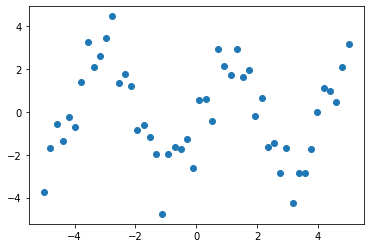

In [249]:
plt.plot(x_data, y_data, 'o')

In [250]:
def fitting_function(x, a, b):
    return a * np.sin(b * x)

In [251]:
params, params_covariance = curve_fit(fitting_function, x_data, y_data)

In [252]:
params

array([2.77306529, 1.52427145])

In [253]:
curve_y_data = [fitting_function(x, *params) for x in x_data]

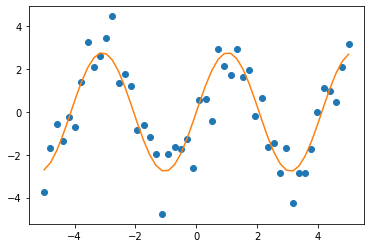

In [254]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, curve_y_data)

### Разреженные матрицы

https://docs.scipy.org/doc/scipy/reference/sparse.html

https://matteding.github.io/2019/04/25/sparse-matrices/

## Что почитать еще?

<table>
    <tr>
        <td><img src="files/book01.jpeg" width="300px"/></td>
        <td><img src="files/book02.jpg" width="300px"/></td>
    </tr>
</table>

1. Jake VanderPlas. Python Data Science Handbook (Вандер Плас Дж. Python для сложных задач.)
[англ.](https://jakevdp.github.io/PythonDataScienceHandbook/)
2. Wes McKinney. Python for Data Analysis (Маккини Уэс. Python и анализ данных)

И последний совет на сегодня...

<center><h3>Не забываем пользоваться поиском, читать документацию и stackoverflow</h3></center>